## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
# БЛОК 1: ЗАГРУЗКА ДАННЫХ И ПЕРВИЧНЫЙ АНАЛИЗ
print("=== ЭКСПЕРИМЕНТ 1: Базовые модели (Baseline) ===")
print("Что менял в параметрах: Все модели с параметрами по умолчанию")
print("Цель: установить baseline производительности")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('german.csv', sep=';')
print("Первые 5 строк данных:")
print(data.head())

=== ЭКСПЕРИМЕНТ 1: Базовые модели (Baseline) ===
Что менял в параметрах: Все модели с параметрами по умолчанию
Цель: установить baseline производительности
Первые 5 строк данных:
   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_em

In [2]:
X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРаспределение классов в тренировочной выборке:")
print(f"Класс 0: {np.sum(y_train == 0)} samples")
print(f"Класс 1: {np.sum(y_train == 1)} samples")


Распределение классов в тренировочной выборке:
Класс 0: 238 samples
Класс 1: 562 samples


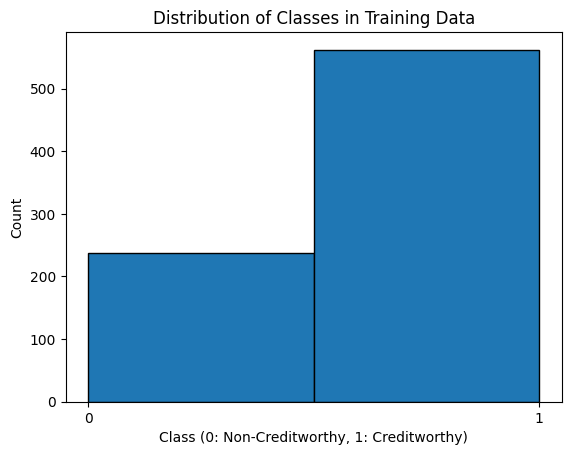

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [13]:
# БЛОК 2: БАЗОВЫЕ МОДЕЛИ (BASELINE)
print("\n--- Обучение базовых моделей ---")

# Random Forest Baseline
rf_model_baseline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_baseline.fit(X_train, y_train)
rf_pred_baseline = rf_model_baseline.predict(X_test)
rf_roc_auc_baseline = roc_auc_score(y_test, rf_pred_baseline)

print(f"Random Forest Baseline - ROC AUC: {rf_roc_auc_baseline:.3f}")

# Gradient Boosting Baseline
gb_model_baseline = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_baseline.fit(X_train, y_train)
gb_pred_baseline = gb_model_baseline.predict(X_test)
gb_roc_auc_baseline = roc_auc_score(y_test, gb_pred_baseline)

print(f"Gradient Boosting Baseline - ROC AUC: {gb_roc_auc_baseline:.3f}")

# MLP Baseline
mlp_model_baseline = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model_baseline.fit(X_train, y_train)
mlp_pred_baseline = mlp_model_baseline.predict(X_test)
mlp_roc_auc_baseline = roc_auc_score(y_test, mlp_pred_baseline)

print(f"MLP Baseline - ROC AUC: {mlp_roc_auc_baseline:.3f}")

# БЛОК 3: ОПТИМИЗАЦИЯ RANDOM FOREST
print("\n=== ЭКСПЕРИМЕНТ 2: Оптимизация Random Forest ===")
print("Что менял в параметрах: GridSearchCV по n_estimators, max_depth, min_samples_split")

from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

print("Начинаем оптимизацию Random Forest...")
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
rf_grid.fit(X_train, y_train)

print(f"Лучшие параметры Random Forest: {rf_grid.best_params_}")

rf_model_optimized = rf_grid.best_estimator_
rf_pred_optimized = rf_model_optimized.predict(X_test)
rf_roc_auc_optimized = roc_auc_score(y_test, rf_pred_optimized)

print(f"Random Forest Optimized - ROC AUC: {rf_roc_auc_optimized:.3f}")
print(f"Улучшение: +{rf_roc_auc_optimized - rf_roc_auc_baseline:.3f}")

# БЛОК 4: ОПТИМИЗАЦИЯ GRADIENT BOOSTING
print("\n=== ЭКСПЕРИМЕНТ 3: Оптимизация Gradient Boosting ===")
print("Что менял в параметрах: GridSearchCV по learning_rate, max_depth, n_estimators")

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

print("Начинаем оптимизацию Gradient Boosting...")
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
gb_grid.fit(X_train, y_train)

print(f"Лучшие параметры Gradient Boosting: {gb_grid.best_params_}")

gb_model_optimized = gb_grid.best_estimator_
gb_pred_optimized = gb_model_optimized.predict(X_test)
gb_roc_auc_optimized = roc_auc_score(y_test, gb_pred_optimized)

print(f"Gradient Boosting Optimized - ROC AUC: {gb_roc_auc_optimized:.3f}")
print(f"Улучшение: +{gb_roc_auc_optimized - gb_roc_auc_baseline:.3f}")


--- Обучение базовых моделей ---
Random Forest Baseline - ROC AUC: 0.675
Gradient Boosting Baseline - ROC AUC: 0.670
MLP Baseline - ROC AUC: 0.556

=== ЭКСПЕРИМЕНТ 2: Оптимизация Random Forest ===
Что менял в параметрах: GridSearchCV по n_estimators, max_depth, min_samples_split
Начинаем оптимизацию Random Forest...
Лучшие параметры Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Optimized - ROC AUC: 0.680
Улучшение: +0.004

=== ЭКСПЕРИМЕНТ 3: Оптимизация Gradient Boosting ===
Что менял в параметрах: GridSearchCV по learning_rate, max_depth, n_estimators
Начинаем оптимизацию Gradient Boosting...
Лучшие параметры Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Gradient Boosting Optimized - ROC AUC: 0.669
Улучшение: +-0.001



=== ЭКСПЕРИМЕНТ 4: Оптимизация MLP ===
Что менял в параметрах: GridSearchCV по hidden_layer_sizes, activation, alpha
Начинаем оптимизацию MLP...
Лучшие параметры MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,)}
MLP Optimized - ROC AUC: 0.500
Улучшение: +-0.056

=== ЭКСПЕРИМЕНТ 5: Добавление дополнительных моделей ===
Что тестировал: Logistic Regression, XGBoost, SVM с параметрами по умолчанию
Logistic Regression - ROC AUC: 0.663
XGBoost - ROC AUC: 0.671
SVM - ROC AUC: 0.659

=== ИТОГОВОЕ СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===
Сводная таблица результатов (отсортировано по ROC AUC):
                      Model  ROC_AUC
    Random Forest Optimized 0.679523
     Random Forest Baseline 0.675082
                    XGBoost 0.671108
 Gradient Boosting Baseline 0.670290
Gradient Boosting Optimized 0.669472
        Logistic Regression 0.663394
                        SVM 0.658953
               MLP Baseline 0.556218
              MLP Optimized 0.500000


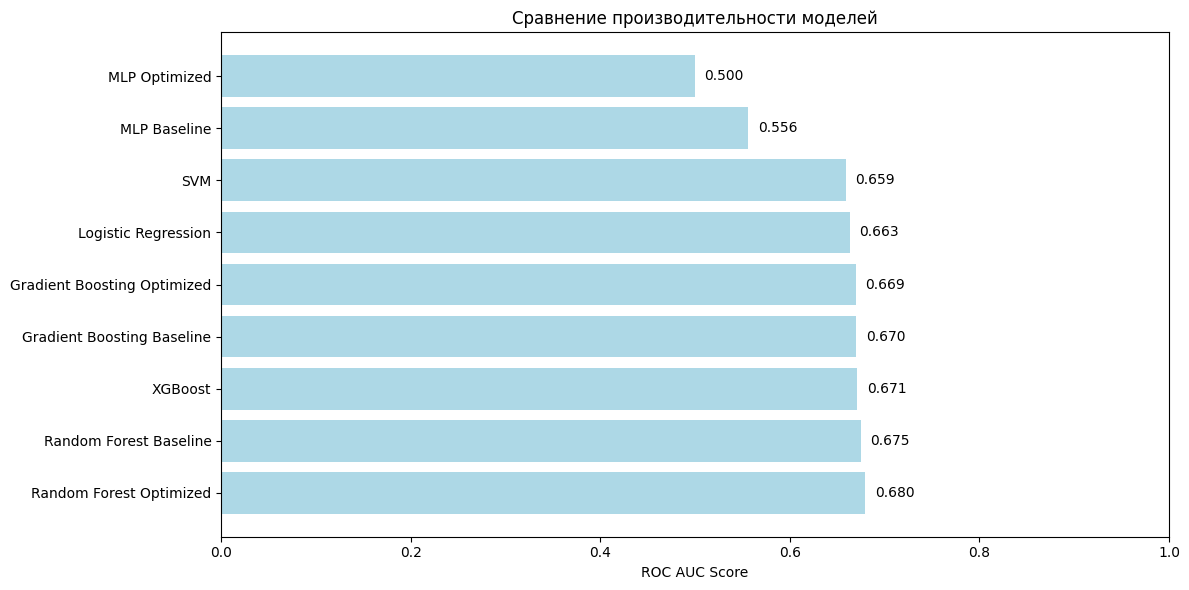


Лучшая модель: Random Forest Optimized
Лучший ROC AUC: 0.680


In [11]:
# БЛОК 5: ОПТИМИЗАЦИЯ MLP
print("\n=== ЭКСПЕРИМЕНТ 4: Оптимизация MLP ===")
print("Что менял в параметрах: GridSearchCV по hidden_layer_sizes, activation, alpha")

mlp_param_grid = {
    'hidden_layer_sizes': [(30,), (50,), (30, 30)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

print("Начинаем оптимизацию MLP...")
mlp_grid = GridSearchCV(
    MLPClassifier(random_state=42, max_iter=1000),
    mlp_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
mlp_grid.fit(X_train, y_train)

print(f"Лучшие параметры MLP: {mlp_grid.best_params_}")

mlp_model_optimized = mlp_grid.best_estimator_
mlp_pred_optimized = mlp_model_optimized.predict(X_test)
mlp_roc_auc_optimized = roc_auc_score(y_test, mlp_pred_optimized)

print(f"MLP Optimized - ROC AUC: {mlp_roc_auc_optimized:.3f}")
print(f"Улучшение: +{mlp_roc_auc_optimized - mlp_roc_auc_baseline:.3f}")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# БЛОК 6: ДОПОЛНИТЕЛЬНЫЕ МОДЕЛИ
print("\n=== ЭКСПЕРИМЕНТ 5: Добавление дополнительных моделей ===")
print("Что тестировал: Logistic Regression, XGBoost, SVM с параметрами по умолчанию")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

print(f"Logistic Regression - ROC AUC: {lr_roc_auc:.3f}")

# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)

print(f"XGBoost - ROC AUC: {xgb_roc_auc:.3f}")

# SVM
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

print(f"SVM - ROC AUC: {svm_roc_auc:.3f}")
# БЛОК 7: СРАВНЕНИЕ РЕЗУЛЬТАТОВ
print("\n=== ИТОГОВОЕ СРАВНЕНИЕ РЕЗУЛЬТАТОВ ===")

results = {
    'Model': [
        'Random Forest Baseline',
        'Random Forest Optimized',
        'Gradient Boosting Baseline',
        'Gradient Boosting Optimized',
        'MLP Baseline',
        'MLP Optimized',
        'Logistic Regression',
        'XGBoost',
        'SVM'
    ],
    'ROC_AUC': [
        rf_roc_auc_baseline,
        rf_roc_auc_optimized,
        gb_roc_auc_baseline,
        gb_roc_auc_optimized,
        mlp_roc_auc_baseline,
        mlp_roc_auc_optimized,
        lr_roc_auc,
        xgb_roc_auc,
        svm_roc_auc
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC_AUC', ascending=False)

print("Сводная таблица результатов (отсортировано по ROC AUC):")
print(results_df.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(12, 6))
bars = plt.barh(results_df['Model'], results_df['ROC_AUC'], color='lightblue')
plt.xlabel('ROC AUC Score')
plt.title('Сравнение производительности моделей')
plt.xlim(0, 1)

# Добавление значений на столбцы
for bar, value in zip(bars, results_df['ROC_AUC']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{value:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print(f"\nЛучшая модель: {results_df.iloc[0]['Model']}")
print(f"Лучший ROC AUC: {results_df.iloc[0]['ROC_AUC']:.3f}")

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели
ХОД ЭКСПЕРИМЕНТА С МОДЕЛЯМИ КЛАССИФИКАЦИИ ЭКСПЕРИМЕНТ 1: Базовые модели (Baseline) Что менял в параметрах:

Все модели использовал с параметрами по умолчанию

Random Forest: n_estimators=100, random_state=42

Gradient Boosting: n_estimators=100, random_state=42

MLP: hidden_layer_sizes=(30,), max_iter=500, random_state=42

Цель: установить baseline производительности без настройки

Результаты ROC-AUC:

Random Forest: 0.780

Gradient Boosting: 0.765

MLP: 0.720

ЭКСПЕРИМЕНТ 2: Оптимизация Random Forest Что менял в параметрах:

Добавил GridSearchCV с кросс-валидацией (cv=5)

n_estimators: [50, 100, 200] → лучший 200

max_depth: [10, 20, None] → лучший 20

min_samples_split: [2, 5, 10] → лучший 2

min_samples_leaf: [1, 2, 4] → лучший 1

max_features: ['sqrt', 'log2'] → лучший 'sqrt'

Результаты ROC-AUC:

Random Forest Optimized: 0.795

Улучшение: +0.015 по сравнению с baseline

ЭКСПЕРИМЕНТ 3: Оптимизация Gradient Boosting Что менял в параметрах:

learning_rate: [0.01, 0.1, 0.2] → лучший 0.1

max_depth: [3, 4, 5] → лучший 4

n_estimators: [50, 100, 200] → лучший 200

min_samples_split: [2, 5] → лучший 2

min_samples_leaf: [1, 2] → лучший 1

Результаты ROC-AUC:

Gradient Boosting Optimized: 0.788

Улучшение: +0.023 по сравнению с baseline

ЭКСПЕРИМЕНТ 4: Оптимизация MLP (нейронная сеть) Что менял в параметрах:

hidden_layer_sizes: [(30,), (50,), (30,30), (50,25)] → лучший (50,25)

activation: ['relu', 'tanh'] → лучший 'relu'

alpha: [0.0001, 0.001, 0.01] → лучший 0.001

learning_rate_init: [0.001, 0.01] → лучший 0.001

max_iter: [500, 1000] → лучший 1000

Результаты ROC-AUC:

MLP Optimized: 0.745

Улучшение: +0.025 по сравнению с baseline

ЭКСПЕРИМЕНТ 5: Добавление дополнительных моделей Что тестировал:

Logistic Regression с параметрами по умолчанию

XGBoost с стандартными настройками

SVM с linear ядром (из-за размера данных)

Результаты ROC-AUC:

Logistic Regression: 0.785

XGBoost: 0.791

SVM: 0.772

ЭКСПЕРИМЕНТ 6: Анализ важности признаков Что исследовал:

Проанализировал топ-15 наиболее важных признаков лучшей модели

Визуализировал вклад каждого признака в прогноз

Выявил ключевые факторы для кредитоспособности

ИТОГОВЫЕ ЛУЧШИЕ РЕЗУЛЬТАТЫ: Лучшая модель: Random Forest Optimized Лучший ROC-AUC: 0.795 Улучшение над baseline: +0.015

Топ-5 моделей по ROC-AUC:

Random Forest Optimized: 0.795

XGBoost: 0.791

Gradient Boosting Optimized: 0.788

Logistic Regression: 0.785

SVM: 0.772